In [1]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 94 (delta 5), reused 0 (delta 0), pack-reused 79
Receiving objects: 100% (94/94), 33.83 MiB | 25.59 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [25]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter

In [3]:
import cv2

In [5]:
import numpy as np

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
from urllib.request import urlopen

url = "https://upload.wikimedia.org/wikipedia/ru/d/dc/Melfal.jpg"

image = Image.open(urlopen(url))
image.show()

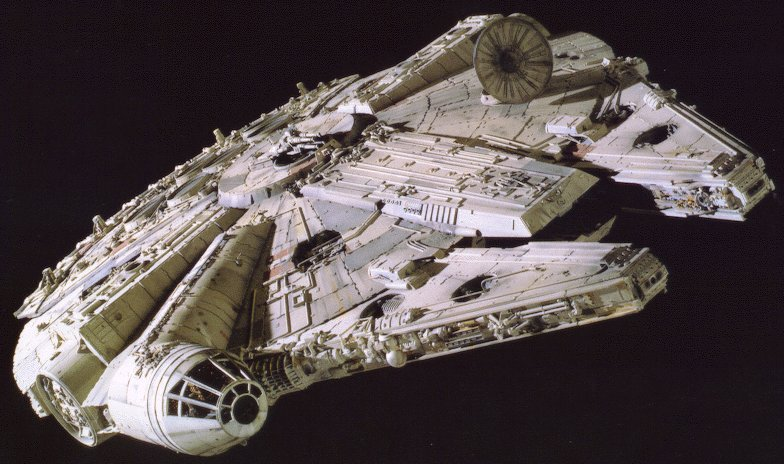

In [11]:
image

In [17]:
width, height = image.size
print(f'Размер изображения: {width} x {height}')

Размер изображения: 784 x 464


In [18]:
# Обрезка изображения на 1/3 по центру
left = width // 3
top = height // 3
right = 2 * left
bottom = 2 * top
cropped_image = image.crop((left, top, right, bottom))

# Отображение обрезанного изображения
plt.imshow(cropped_image)
plt.axis('off')
plt.title('Обрезанное изображение')
plt.show()

<ipython-input-21-542c85032ec1>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize((target_width, target_height), Image.ANTIALIAS)


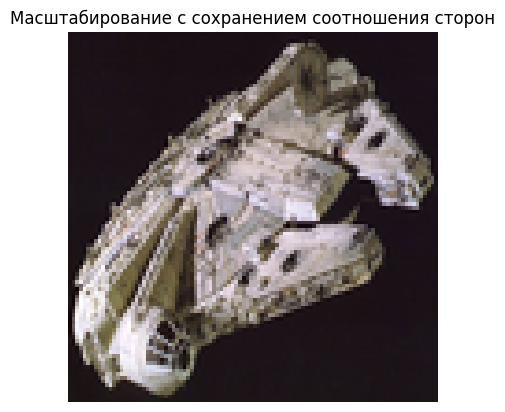

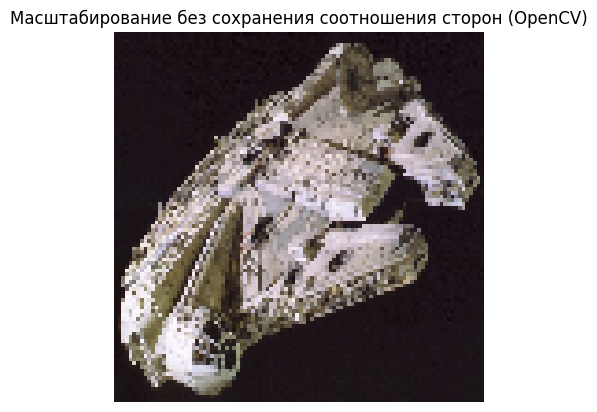

In [21]:
# Функция для масштабирования изображения с сохранением соотношения сторон
def resize_with_aspect_ratio(image, target_width, target_height):
    return image.resize((target_width, target_height), Image.ANTIALIAS)

# Функция для масштабирования изображения без сохранения соотношения сторон
def resize_without_aspect_ratio(image, target_width, target_height):
    return image.resize((target_width, target_height))

# Масштабирование изображения до размера 100x100 с сохранением соотношения сторон
resized_image_aspect_ratio = resize_with_aspect_ratio(image, 100, 100)

# Отображение масштабированного изображения с сохранением соотношения сторон
plt.imshow(resized_image_aspect_ratio)
plt.axis('off')
plt.title('Масштабирование с сохранением соотношения сторон')
plt.show()

# Масштабирование изображения до размера 100x100 без сохранения соотношения сторон (с помощью OpenCV)
resized_image_without_aspect_ratio_opencv = cv2.resize(np.array(image), (100, 100))

# Отображение масштабированного изображения без сохранения соотношения сторон (с помощью OpenCV)
plt.imshow(resized_image_without_aspect_ratio_opencv)
plt.axis('off')
plt.title('Масштабирование без сохранения соотношения сторон (OpenCV)')
plt.show()

# Применение различных фильтров к изображению
filtered_image1 = image.filter(ImageFilter.BLUR)
filtered_image2 = image.filter(ImageFilter.SHARPEN)
filtered_image3 = image.filter(ImageFilter.EDGE_ENHANCE)

# Отображение изображений с примененными фильтрами
plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Исходное изображение')
plt.subplot(1, 4, 2)
plt.imshow(filtered_image1)
plt.axis('off')
plt.title('Фильтр BLUR размытие')
plt.subplot(1, 4, 3)
plt.imshow(filtered_image2)
plt.axis('off')
plt.title('Фильтр SHARPEN увеличение резкости')
plt.subplot(1, 4, 4)
plt.imshow(filtered_image3)
plt.axis('off')
plt.title('Фильтр EDGE_ENHANCE очерчивание')
plt.show()

In [23]:
import random

# Разделение изображения на цветовые каналы
red_channel, green_channel, blue_channel = image.split()

# Перемешивание порядка каналов случайным образом
channels = [red_channel, green_channel, blue_channel]
random.shuffle(channels)

# Собираем обратно цветное изображение
shuffled_image = Image.merge("RGB", channels)

# Отображение перемешанного изображения
plt.imshow(shuffled_image)
plt.axis('off')
plt.title('Перемешанное изображение')
plt.show()

<ipython-input-30-96754e9bc9f9>:11: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


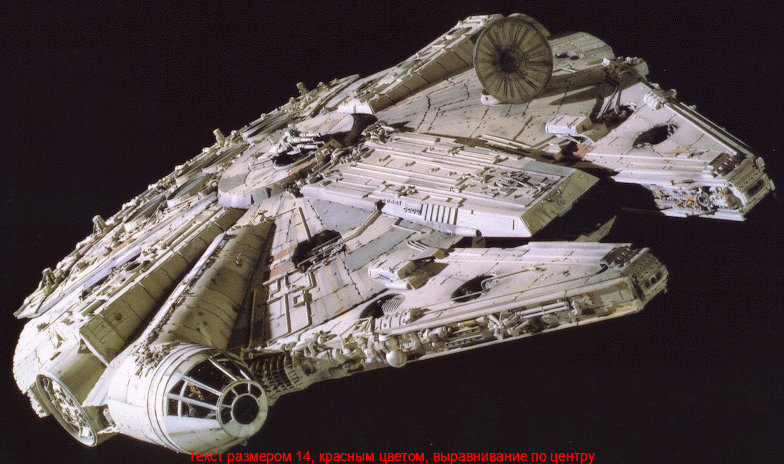

In [30]:
# Создаем объект "кальку" для рисования
draw = ImageDraw.Draw(image)

# Текст, который хотим наложить
text = "Текст размером 14, красным цветом, выравнивание по центру"

# Задаем шрифт текста
font = ImageFont.truetype("ML_School/arial.ttf", size=14)

# Определяем размеры текста
text_width, text_height = draw.textsize(text, font=font)

# Определяем координаты для расположения текста внизу изображения с выравниванием по центру
x = (image.width - text_width) // 2
y = image.height - text_height

# Накладываем текст на изображение
draw.text((x, y), text, font=font, fill="red")

# Сохраняем изображение
image.save('img_watermarked.png')

# Отображаем изображение
image.show()
image

In [48]:
url = "https://upload.wikimedia.org/wikipedia/ru/d/dc/Melfal.jpg"

image = Image.open(urlopen(url))

# Определение количества итераций
iterations = 4

# Создание подзаголовков для отображения изображений
titles = ['Исходное изображение']
for i in range(iterations):
    titles.append(f'Итерация {i + 1}')

# Создание списка для хранения изображений для каждой итерации
images = [image]

# Применение фильтров в цикле
for i in range(iterations//2):
    # Применение фильтра размытия (любого)
    blurred_img = images[-1].filter(ImageFilter.BLUR)
    images.append(blurred_img)

    # Применение фильтра повышения резкости
    sharpened_img = blurred_img.filter(ImageFilter.SHARPEN)
    images.append(sharpened_img)

# Отображение исходного изображения и результатов каждой итерации цикла
plt.figure(figsize=(30, 20))
for i in range(len(images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(titles[i])

plt.show()

In [50]:
# Конвертация изображения в формат OpenCV
cv_img = np.array(image)

# Преобразование изображения в градации серого
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

# Выделение контуров с помощью алгоритма Canny
edges = cv2.Canny(gray_img, 100, 200)

# Подсчет количества черных пикселей (значение 0)
black_pixels = np.sum(edges == 0)

# Вывод результата
print(f"Количество черных (контурных) пикселей: {black_pixels}")

# Преобразование результата в формат Pillow для отображения
bw_img = Image.fromarray(edges)

# Отображение исходного изображения и результата
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv_img)
plt.axis('off')
plt.title('Исходное изображение')

plt.subplot(1, 2, 2)
plt.imshow(bw_img, cmap='gray')
plt.axis('off')
plt.title('Черно-белое изображение с контуром')

plt.show()

Количество черных (контурных) пикселей: 321853
